# This program attempts to predict the mutation score 

In [1]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install scikit-learn pandas numpy matplotlib 

  Using cached scikit_learn-1.5.1-cp312-cp312-macosx_12_0_arm64.whl.metadata (12 kB)
  Using cached pandas-2.2.2-cp312-cp312-macosx_11_0_arm64.whl.metadata (19 kB)
  Using cached numpy-2.0.1-cp312-cp312-macosx_11_0_arm64.whl.metadata (114 kB)
  Using cached scipy-1.14.0-cp312-cp312-macosx_12_0_arm64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.2.1-cp312-cp312-macosx_11_0_arm64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.53.1-cp312-cp312-macosx_11_0_arm64.whl.metadata (162 kB)
  Using cached kiwisolver-1.4.5-cp312-cp312-macosx_11_0_arm64.whl.metadata (6.4 kB)
  Using cached pillow-10.4.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (9.2 kB)
  Using cached py

In [3]:
pip install ruamel.yaml

  Using cached ruamel.yaml-0.18.6-py3-none-any.whl.metadata (23 kB)
  Using cached ruamel.yaml.clib-0.2.8-cp312-cp312-macosx_13_0_arm64.whl.metadata (2.2 kB)
Using cached ruamel.yaml-0.18.6-py3-none-any.whl (117 kB)
Using cached ruamel.yaml.clib-0.2.8-cp312-cp312-macosx_13_0_arm64.whl (135 kB)
Note: you may need to restart the kernel to use updated packages.


In [8]:
from sklearn import datasets
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

## Read and Process Dataframe

Combining data from the following analysis: 
* diagrams_output.json
* pythonPoetry_output.json
* multi_output.json
* pudb_output.json
* pls_output.json
* poetryize_output.json
* aeval.json
* trogon_output.json
* playground_output.json
* code_output.json
* dummy_project.json
* pyCicd_output.json

In [40]:
def process_json_file(filepath):
    sub_df = pd.read_json(filepath)
    #Drop NA values
    sub_df = sub_df.dropna()
    #Drop "test_" functions
    sub_df = sub_df[~sub_df['function_name'].str.startswith("test_")]
    return sub_df

In [41]:
dataframes = []
folder_path = "../json_analysis"

for filename in os.listdir(folder_path):
    if filename.endswith("json"):
        print(filename)
        filepath = os.path.join(folder_path, filename)
        sub_df = process_json_file(filepath)
        sub_df.insert(0,"filename",filename)
        dataframes.append(sub_df)

df = pd.concat(dataframes, ignore_index=True)

diagrams_output.json
pythonPoetry_output.json
pudb_output.json
poetryize_output.json
playground_output.json
code_output.json
dummy_project.json
pyCicd_output.json


In [42]:
df

,filename,function_name,function_scope,patterns,mutants,mutation_score
0,diagrams_output.json,pre_mutation,3-11,"[{'lineno': 6, 'coloffset': 4, 'linematch': 'i...","[{'name': 'Mutant #367', 'line': 9, 'descripti...",0.000000
1,diagrams_output.json,render,193-198,"[{'lineno': 194, 'coloffset': 8, 'linematch': ...","[{'name': 'Mutant #107', 'line': 196, 'descrip...",0.000000
2,diagrams_output.json,__init__,446-487,"[{'lineno': 466, 'coloffset': 8, 'linematch': ...","[{'name': 'Mutant #224', 'line': 449, 'descrip...",11.764706
3,diagrams_output.json,append,515-525,"[{'lineno': 518, 'coloffset': 12, 'linematch':...","[{'name': 'Mutant #247', 'line': 516, 'descrip...",25.000000
4,diagrams_output.json,connect,527-540,"[{'lineno': 528, 'coloffset': 8, 'linematch': ...","[{'name': 'Mutant #251', 'line': 533, 'descrip...",100.000000
...,...,...,...,...,...,...
250,dummy_project.json,setSSN,306-308,"[{'lineno': 306, 'coloffset': 4, 'linematch': ...","[{'name': 'Mutant #175', 'line': 307, 'descrip...",100.000000
251,dummy_project.json,setEmail,309-311,"[{'lineno': 309, 'coloffset': 4, 'linematch': ...","[{'name': 'Mutant #176', 'line': 310, 'descrip...",100.000000
252,dummy_project.json,setAddress,312-314,"[{'lineno': 312, 'coloffset': 4, 'linematch': ...","[{'name': 'Mutant #177', 'line': 313, 'descrip...",100.000000
253,dummy_project.json,create_person,315-318,"[{'lineno': 315, 'coloffset': 4, 'linematch': ...","[{'name': 'Mutant #178', 'line': 316, 'descrip...",100.000000


**Dropping all mutation_score with 'NA' values**

### Parsing data: check_ids and patterns

In [120]:
def extract_pattern_id(df):
    df['check_ids'] = df['patterns'].apply(lambda x: [pattern['check_id'] for pattern in x if 'check_id' in pattern])
    df['check_ids'] = df['check_ids'].apply(pd.unique)
    df['unique_patterns'] = df['patterns'].apply(lambda x: [pattern['pattern'] for pattern in x])
    df['unique_patterns'] = df['unique_patterns'].apply(pd.unique)
    return df

In [121]:
df = extract_pattern_id(df.copy())

/var/folders/65/kncftb993gbgr8l9k8pzgjlh0000gn/T/ipykernel_57464/1785012781.py:3: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  df['check_ids'] = df['check_ids'].apply(pd.unique)
/var/folders/65/kncftb993gbgr8l9k8pzgjlh0000gn/T/ipykernel_57464/1785012781.py:5: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  df['unique_patterns'] = df['unique_patterns'].apply(pd.unique)


In [122]:
df

,filename,function_name,function_scope,patterns,mutants,mutation_score,check_ids,unique_patterns,pattern_existence,mutation_category
0,diagrams_output.json,pre_mutation,3-11,"[{'lineno': 6, 'coloffset': 4, 'linematch': 'i...","[{'name': 'Mutant #367', 'line': 9, 'descripti...",0.000000,"[CL001, ANNOT001, FLV001, CML001]","[.//FunctionDef/body//If, .//FunctionDef[not(a...","{'single-nested-if': 1, 'double-nested-if': 0,...",below average
1,diagrams_output.json,render,193-198,"[{'lineno': 194, 'coloffset': 8, 'linematch': ...","[{'name': 'Mutant #107', 'line': 196, 'descrip...",0.000000,"[CL001, ANNOT001, C002, CML001]","[.//FunctionDef/body//If, .//FunctionDef[not(a...","{'single-nested-if': 1, 'double-nested-if': 0,...",below average
2,diagrams_output.json,__init__,446-487,"[{'lineno': 466, 'coloffset': 8, 'linematch': ...","[{'name': 'Mutant #224', 'line': 449, 'descrip...",11.764706,"[CL001, ANNOT001, F002, C002, CML001, F030, P005]","[.//FunctionDef/body//If, .//FunctionDef[not(a...","{'single-nested-if': 1, 'double-nested-if': 0,...",below average
3,diagrams_output.json,append,515-525,"[{'lineno': 518, 'coloffset': 12, 'linematch':...","[{'name': 'Mutant #247', 'line': 516, 'descrip...",25.000000,"[CL001, ANNOT001, C002, CML001]","[.//FunctionDef/body//If, .//FunctionDef[not(a...","{'single-nested-if': 1, 'double-nested-if': 0,...",below average
4,diagrams_output.json,connect,527-540,"[{'lineno': 528, 'coloffset': 8, 'linematch': ...","[{'name': 'Mutant #251', 'line': 533, 'descrip...",100.000000,"[CL001, ANNOT001, C002, CML001, MRET001, F030,...","[.//FunctionDef/body//If, .//FunctionDef[not(a...","{'single-nested-if': 1, 'double-nested-if': 0,...",above average
...,...,...,...,...,...,...,...,...,...,...
250,dummy_project.json,setSSN,306-308,"[{'lineno': 306, 'coloffset': 4, 'linematch': ...","[{'name': 'Mutant #175', 'line': 307, 'descrip...",100.000000,"[ANNOT001, C002, CML001]",[.//FunctionDef[not(args/arg/annotation) or no...,"{'single-nested-if': 0, 'double-nested-if': 0,...",above average
251,dummy_project.json,setEmail,309-311,"[{'lineno': 309, 'coloffset': 4, 'linematch': ...","[{'name': 'Mutant #176', 'line': 310, 'descrip...",100.000000,"[ANNOT001, C002, CML001]",[.//FunctionDef[not(args/arg/annotation) or no...,"{'single-nested-if': 0, 'double-nested-if': 0,...",above average
252,dummy_project.json,setAddress,312-314,"[{'lineno': 312, 'coloffset': 4, 'linematch': ...","[{'name': 'Mutant #177', 'line': 313, 'descrip...",100.000000,"[ANNOT001, C002, CML001]",[.//FunctionDef[not(args/arg/annotation) or no...,"{'single-nested-if': 0, 'double-nested-if': 0,...",above average
253,dummy_project.json,create_person,315-318,"[{'lineno': 315, 'coloffset': 4, 'linematch': ...","[{'name': 'Mutant #178', 'line': 316, 'descrip...",100.000000,"[ANNOT001, C002, CML001]",[.//FunctionDef[not(args/arg/annotation) or no...,"{'single-nested-if': 0, 'double-nested-if': 0,...",above average


### Collect all patterns from the config files

In [123]:
import os
import ruamel.yaml

In [124]:

def get_patterns_from_yaml(filepath, key):
  """
  Extracts patterns from the 'pattern' key under the 'checks' key in a YAML file.

  Args:
      filepath: Path to the YAML file.

  Returns:
      A list of patterns found in the YAML file, or None if parsing fails.
  """
  try:
    with open(filepath) as f:
      yaml = ruamel.yaml.YAML(typ='safe', pure=True)  # Use new API for safe loading
      data = yaml.load(f)
      checks = data.get("checks")  # Get the 'checks' dictionary
      if checks:
        patterns = [check.get(key) for check in checks]  # Extract patterns from checks
        return patterns if any(patterns) else None  # Return only if patterns exist
      else:
        print(f"Warning: 'checks' key not found in YAML file: {filepath}")
        return None
  except ruamel.yaml.YAMLError as e:
    print(f"Error parsing YAML file '{filepath}': {e}")
    return None

In [125]:
def collect_config_patterns(config_dir):
  """
  DO NOT USE
  Collects unique patterns from all YAML files in a directory.

  Args:
      config_dir: The directory containing the YAML files.

  Returns:
      A list of unique patterns found in the YAML files.
  """
  all_patterns = []

  # Check if config directory exists
  if not os.path.isdir(config_dir):
    raise ValueError(f"Directory '{config_dir}' does not exist.")
  for filename in os.listdir(config_dir):
    if filename.endswith(".yml"):
      filepath = os.path.join(config_dir, filename)
      patterns = get_patterns_from_yaml(filepath)
      if patterns:
        all_patterns.extend(patterns) #Extend list with patterns from each file
  #Remove duplicates using set
  config_patterns = set(all_patterns)

  return config_patterns

In [126]:
config_file = "../Config/AllChecks.yml"  # Replace with your actual directory path
config_patterns = get_patterns_from_yaml(config_file, "pattern")
config_names = get_patterns_from_yaml(config_file, "name")

if config_patterns:
    #print("Unique patterns found:",config_patterns, len(config_patterns))
    print()
    print("Unique names found:",config_names, len(config_names))
    print()
    pass
else:
  print("No patterns found in the YAML files.")

pattern_dict = dict(zip(config_names, config_patterns))
print(pattern_dict)
print(f" There are {len(pattern_dict)} found.")


Unique names found: ['single-nested-if', 'double-nested-if', 'explicit-return-in-init', 'none-comparison', 'no-exception-type', 'boolean-comparison', 'missing-annotations', 'key-function', 'multi-value-key-literal', 'assert-tuple', 'loop-variable-iterates-overrides-iterator', 'function-uses-loop-variable', 'nested-depth', 'number-of-conditions-in-function', 'nested-conditions', 'nested-condition-loops', 'nested-loop-conditions', 'nested-loop-conditions-ff', 'number-of-assertions', 'count-test-method-lines', 'count-method-lines', 'test-methods-invoking-method', 'not-using-context-manager', 'multiple-returns-in-function', 'complex-expressions', 'unused-variables', 'method-too-long', 'high-cyclomatic-complexity', 'long-method-chaining', 'deeply-nested-control-structures', 'god-function', 'empty-catch-block', 'magic-numbers', 'use-of-global-variables', 'large-class', 'long-parameter-list'] 36

{'single-nested-if': './/FunctionDef/body//If', 'double-nested-if': './/FunctionDef/body//If[anc

In [127]:
supplement_df_1 = pd.DataFrame(pattern_dict.items(), columns=['description', 'pattern'])

In [128]:
supplement_df_1

,description,pattern
0,single-nested-if,.//FunctionDef/body//If
1,double-nested-if,.//FunctionDef/body//If[ancestor::If and not(p...
2,explicit-return-in-init,".//FunctionDef[@name=""__init__""]/body/Return"
3,none-comparison,".//FunctionDef//Compare/left[@id=""input_dirs""]..."
4,no-exception-type,.//FunctionDef//Try/ExceptHandler[not(ExceptHa...
5,boolean-comparison,.//FunctionDef//Compare/ops/Is | .//FunctionDe...
6,missing-annotations,.//FunctionDef[not(args/arg/annotation) or not...
7,key-function,".//FunctionDef//Call/func/Attribute[@attr=""keys""]"
8,multi-value-key-literal,.//FunctionDef/body/Assign/value/Dict/keys/Nam...
9,assert-tuple,.//FunctionDef[./body/Assert/test/Tuple]


In [129]:
supplement_df_1.to_csv("supplement_df.csv", index=False)

### Count pattern boolean values

In [130]:
def update_pattern_counts(pattern_list):
  function_pattern = {pattern_name: 0 for pattern_name in pattern_dict}
  for pattern in pattern_list:
    if pattern in pattern_dict.values():
      pattern_name = list(pattern_dict.keys())[list(pattern_dict.values()).index(pattern)]
      function_pattern[pattern_name] += 1
  return function_pattern

df['pattern_existence'] = df['unique_patterns'].apply(update_pattern_counts)


In [131]:
df

,filename,function_name,function_scope,patterns,mutants,mutation_score,check_ids,unique_patterns,pattern_existence,mutation_category
0,diagrams_output.json,pre_mutation,3-11,"[{'lineno': 6, 'coloffset': 4, 'linematch': 'i...","[{'name': 'Mutant #367', 'line': 9, 'descripti...",0.000000,"[CL001, ANNOT001, FLV001, CML001]","[.//FunctionDef/body//If, .//FunctionDef[not(a...","{'single-nested-if': 1, 'double-nested-if': 0,...",below average
1,diagrams_output.json,render,193-198,"[{'lineno': 194, 'coloffset': 8, 'linematch': ...","[{'name': 'Mutant #107', 'line': 196, 'descrip...",0.000000,"[CL001, ANNOT001, C002, CML001]","[.//FunctionDef/body//If, .//FunctionDef[not(a...","{'single-nested-if': 1, 'double-nested-if': 0,...",below average
2,diagrams_output.json,__init__,446-487,"[{'lineno': 466, 'coloffset': 8, 'linematch': ...","[{'name': 'Mutant #224', 'line': 449, 'descrip...",11.764706,"[CL001, ANNOT001, F002, C002, CML001, F030, P005]","[.//FunctionDef/body//If, .//FunctionDef[not(a...","{'single-nested-if': 1, 'double-nested-if': 0,...",below average
3,diagrams_output.json,append,515-525,"[{'lineno': 518, 'coloffset': 12, 'linematch':...","[{'name': 'Mutant #247', 'line': 516, 'descrip...",25.000000,"[CL001, ANNOT001, C002, CML001]","[.//FunctionDef/body//If, .//FunctionDef[not(a...","{'single-nested-if': 1, 'double-nested-if': 0,...",below average
4,diagrams_output.json,connect,527-540,"[{'lineno': 528, 'coloffset': 8, 'linematch': ...","[{'name': 'Mutant #251', 'line': 533, 'descrip...",100.000000,"[CL001, ANNOT001, C002, CML001, MRET001, F030,...","[.//FunctionDef/body//If, .//FunctionDef[not(a...","{'single-nested-if': 1, 'double-nested-if': 0,...",above average
...,...,...,...,...,...,...,...,...,...,...
250,dummy_project.json,setSSN,306-308,"[{'lineno': 306, 'coloffset': 4, 'linematch': ...","[{'name': 'Mutant #175', 'line': 307, 'descrip...",100.000000,"[ANNOT001, C002, CML001]",[.//FunctionDef[not(args/arg/annotation) or no...,"{'single-nested-if': 0, 'double-nested-if': 0,...",above average
251,dummy_project.json,setEmail,309-311,"[{'lineno': 309, 'coloffset': 4, 'linematch': ...","[{'name': 'Mutant #176', 'line': 310, 'descrip...",100.000000,"[ANNOT001, C002, CML001]",[.//FunctionDef[not(args/arg/annotation) or no...,"{'single-nested-if': 0, 'double-nested-if': 0,...",above average
252,dummy_project.json,setAddress,312-314,"[{'lineno': 312, 'coloffset': 4, 'linematch': ...","[{'name': 'Mutant #177', 'line': 313, 'descrip...",100.000000,"[ANNOT001, C002, CML001]",[.//FunctionDef[not(args/arg/annotation) or no...,"{'single-nested-if': 0, 'double-nested-if': 0,...",above average
253,dummy_project.json,create_person,315-318,"[{'lineno': 315, 'coloffset': 4, 'linematch': ...","[{'name': 'Mutant #178', 'line': 316, 'descrip...",100.000000,"[ANNOT001, C002, CML001]",[.//FunctionDef[not(args/arg/annotation) or no...,"{'single-nested-if': 0, 'double-nested-if': 0,...",above average


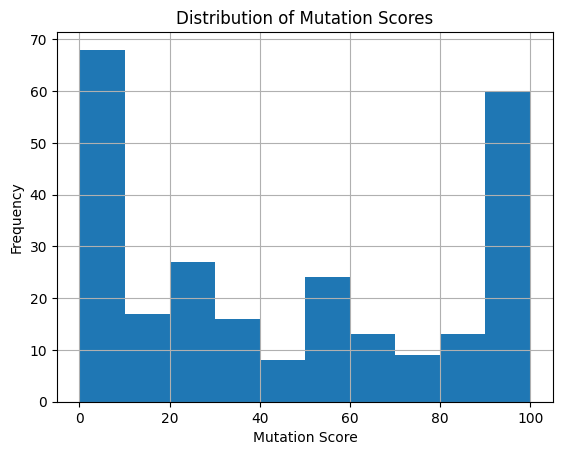

In [132]:
# Distribution of Mutation Scores
mutation_scores = df['mutation_score']
plt.hist(mutation_scores)
plt.xlabel('Mutation Score')
plt.ylabel('Frequency')
plt.title('Distribution of Mutation Scores')
plt.grid(True) 
plt.show()

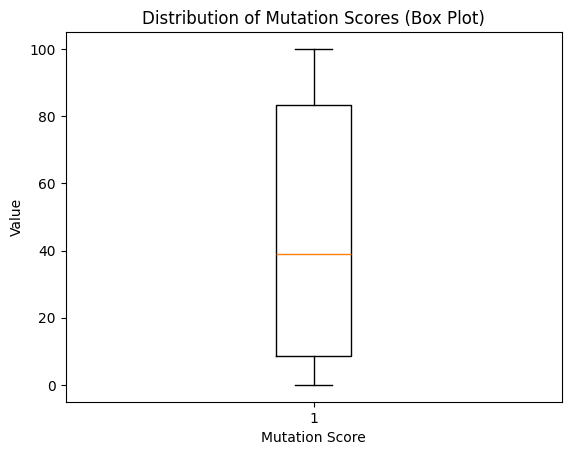

In [133]:
plt.boxplot(mutation_scores)
plt.xlabel('Mutation Score')
plt.ylabel('Value')
plt.title('Distribution of Mutation Scores (Box Plot)')
plt.show()

In [134]:
# catagorize mutation score 
average = 40

def map_to_category(score):
    """Maps a mutation score to a category (high, medium,low)"""
    if score < average:
        return "below average"

    else:
        return "above average"

In [135]:
df = df.assign(mutation_category = df['mutation_score'].apply(map_to_category))

In [136]:
#Counts of mutation score categories
category_counts = df['mutation_category'].value_counts()
print(category_counts)

mutation_category
below average    128
above average    127
Name: count, dtype: int64


**Save current Dataset**

In [137]:
df.to_csv("database.csv", index=False)

#### Create a new DataFrame with the pattern list as column names

In [148]:
def create_pattern_df(df):
    df_new = pd.DataFrame(columns=config_names+['mutation_category'] + ['filename'])
    for i in range(len(df)):
        mutation = df['mutation_category'].iloc[i]
        filename = df['filename'].iloc[i]
        pattern_dict = df['pattern_existence'].iloc[i]
        # Extract pattern values 
        pattern_value_list = list(pattern_dict.values())
        #add the pattern_value_list to df_new
        df_new.loc[i] = pattern_value_list + [mutation] + [filename]
    return df_new

In [149]:
pattern_df = create_pattern_df(df.copy()) 

In [150]:
pattern_df

,single-nested-if,double-nested-if,explicit-return-in-init,none-comparison,no-exception-type,boolean-comparison,missing-annotations,key-function,multi-value-key-literal,assert-tuple,...,long-method-chaining,deeply-nested-control-structures,god-function,empty-catch-block,magic-numbers,use-of-global-variables,large-class,long-parameter-list,mutation_category,filename
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,below average,diagrams_output.json
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,below average,diagrams_output.json
2,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,below average,diagrams_output.json
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,below average,diagrams_output.json
4,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,above average,diagrams_output.json
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,above average,dummy_project.json
251,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,above average,dummy_project.json
252,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,above average,dummy_project.json
253,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,above average,dummy_project.json


In [167]:
pattern_df.to_csv("pattern_df.csv", index=False)

### Leave-One-Project-Out Cross-Validationn(LOPO CV)

Using K-Fold Cross Validation to iterate K times, randomly select one project to hid (validation set) then combine the remaining projects into a single training set

In [168]:
pattern_df

,single-nested-if,double-nested-if,explicit-return-in-init,none-comparison,no-exception-type,boolean-comparison,missing-annotations,key-function,multi-value-key-literal,assert-tuple,...,long-method-chaining,deeply-nested-control-structures,god-function,empty-catch-block,magic-numbers,use-of-global-variables,large-class,long-parameter-list,mutation_category,filename
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,below average,diagrams_output.json
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,below average,diagrams_output.json
2,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,below average,diagrams_output.json
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,below average,diagrams_output.json
4,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,above average,diagrams_output.json
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,above average,dummy_project.json
251,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,above average,dummy_project.json
252,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,above average,dummy_project.json
253,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,above average,dummy_project.json


In [169]:
print(set(pattern_df['filename']))

{'code_output.json', 'dummy_project.json', 'pythonPoetry_output.json', 'poetryize_output.json', 'pyCicd_output.json', 'diagrams_output.json', 'pudb_output.json', 'playground_output.json'}


#### Training on different algorithms

* Random Forest Classifier 
* Gradient Boosting Classifiers
* Support Vector Machine (SVM)

In [172]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, matthews_corrcoef
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def evaluate_projects(pattern_df,algorithms):
    project_wise_f1 = {}
    project_wise_accuracy = {}
    project_wise_precision = {}
    project_wise_recall = {}
    project_wise_mcc = {}
    
    for project_name in set(pattern_df['filename']):
        # Filter data for training (excluding current project)
        X_train = pattern_df[pattern_df['filename'] != project_name].drop(['filename','mutation_category'], axis=1)
        y_train = pattern_df[pattern_df['filename'] != project_name]['mutation_category']
        # Filter data for testing (current project)
        X_test = pattern_df[pattern_df['filename'] == project_name].drop(['filename','mutation_category'], axis=1)
        y_test = pattern_df[pattern_df['filename'] == project_name]['mutation_category']
        
        project_wise_f1[project_name] = {}
        project_wise_accuracy[project_name] = {}
        project_wise_precision[project_name] = {}
        project_wise_recall[project_name] = {}
        project_wise_mcc[project_name] = {}
        
        for name, model in algorithms.items():
            print()
            print(f"Project Targeted: {project_name}")
            print(f"Algorithm: {name}")
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            print("All actual vs. predicted categories:")
            for i in range(len(y_test)):
                print(f"Sample {i+1}: Actual - {y_test.iloc[i]}, Predicted - {y_pred[i]}")
            #Evaluation metrics
            f1 = f1_score(y_test, y_pred, average='weighted')
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred, average='weighted', zero_division = 0)
            recall = recall_score(y_test, y_pred, average='weighted', zero_division = 0)
            mcc = matthews_corrcoef(y_test, y_pred)
            
            project_wise_f1[project_name][name] = f1
            project_wise_accuracy[project_name][name] = accuracy
            project_wise_precision[project_name][name] = precision
            project_wise_recall[project_name][name] = recall
            project_wise_mcc[project_name][name] = mcc
            print("Evaluation Scores:")
            print(f"F1 Score: {f1:.4f}")
            #print(f"Precision: {precision:.4f}")
            #print(f"Recall: {recall:.4f}")
            print(f"MCC: {mcc:.4f}")
            
            y_pred_train = model.predict(X_train)
            y_pred_test = model.predict(X_test)
            accuracy_train = np.mean(y_pred_train == y_train)
            accuracy_test = np.mean(y_pred_test == y_test)
            
        print('-'* 100)
        print("Calculate accuracy")
        print (f'Accuracy of predicting training data = {accuracy_train:0.3f}')
        print (f'Accuracy of predicting test data = {accuracy_test:0.3f}')
        print('-'* 100)
    return project_wise_f1, project_wise_accuracy, project_wise_precision, project_wise_recall, project_wise_mcc

In [177]:
algorithms = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Machine": SVC(),
    "KNN": KNeighborsClassifier()
}
project_wise_f1, project_wise_accuracy, project_wise_precision, project_wise_recall, project_wise_mcc = evaluate_projects(pattern_df.copy(), algorithms)


Project Targeted: code_output.json
Algorithm: Random Forest
All actual vs. predicted categories:
Sample 1: Actual - above average, Predicted - above average
Sample 2: Actual - above average, Predicted - above average
Sample 3: Actual - above average, Predicted - above average
Sample 4: Actual - above average, Predicted - above average
Sample 5: Actual - above average, Predicted - above average
Sample 6: Actual - above average, Predicted - above average
Sample 7: Actual - above average, Predicted - above average
Sample 8: Actual - above average, Predicted - below average
Sample 9: Actual - above average, Predicted - below average
Evaluation Scores:
F1 Score: 0.8750
MCC: 0.0000

Project Targeted: code_output.json
Algorithm: Gradient Boosting
All actual vs. predicted categories:
Sample 1: Actual - above average, Predicted - above average
Sample 2: Actual - above average, Predicted - above average
Sample 3: Actual - above average, Predicted - above average
Sample 4: Actual - above average

/Users/jaclynpham/.local/pipx/venvs/jupyterlab/lib/python3.12/site-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/Users/jaclynpham/.local/pipx/venvs/jupyterlab/lib/python3.12/site-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/Users/jaclynpham/.local/pipx/venvs/jupyterlab/lib/python3.12/site-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/Users/jaclynpham/.local/pipx/venvs/jupyterlab/lib/python3.12/site-packages/sklearn/metrics/_c


Project Targeted: poetryize_output.json
Algorithm: Support Vector Machine
All actual vs. predicted categories:
Sample 1: Actual - above average, Predicted - below average
Evaluation Scores:
F1 Score: 0.0000
MCC: 0.0000

Project Targeted: poetryize_output.json
Algorithm: KNN
All actual vs. predicted categories:
Sample 1: Actual - above average, Predicted - below average
Evaluation Scores:
F1 Score: 0.0000
MCC: 0.0000
----------------------------------------------------------------------------------------------------
Calculate accuracy
Accuracy of predicting training data = 0.626
Accuracy of predicting test data = 0.000
----------------------------------------------------------------------------------------------------

Project Targeted: pyCicd_output.json
Algorithm: Random Forest
All actual vs. predicted categories:
Sample 1: Actual - below average, Predicted - below average
Evaluation Scores:
F1 Score: 1.0000
MCC: 0.0000

Project Targeted: pyCicd_output.json
Algorithm: Gradient Boosti

/Users/jaclynpham/.local/pipx/venvs/jupyterlab/lib/python3.12/site-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/Users/jaclynpham/.local/pipx/venvs/jupyterlab/lib/python3.12/site-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/Users/jaclynpham/.local/pipx/venvs/jupyterlab/lib/python3.12/site-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [179]:
def print_evaluation_table(project_wise_scores, metric_name, title):
  """Prints a table summarizing the evaluation metric (F1-score, accuracy, etc.)
  for each project and model, including average score per model.

  Args:
    project_wise_scores: A dictionary where keys are project names and values are
      dictionaries mapping models to their scores.
    metric_name: The name of the evaluation metric (e.g., "F1-Score", "Accuracy").
    title: The title of the table.
  """
  print(f"{title}:")
  print("-" * 150)  # Adjust width for better alignment
  print("{:<50} | {:>20} | {:>20} | {:>20}| {:>15}|".format("Project Name", metric_name, metric_name, metric_name, metric_name))
  print("-" * 150)
  # Track total scores per model
  model_totals = {model: 0 for model in project_wise_scores[next(iter(project_wise_scores))].keys()}
  count = len(project_wise_scores)  # Total number of projects

  for project, scores in project_wise_scores.items():
    print("{:<50} | {:>20.4f} | {:>20.4f} | {:>20.4f}| {:>15.4f}|".format(project,
                                                                           scores.get("Random Forest", 0),
                                                                           scores.get("Gradient Boosting", 0),
                                                                           scores.get("Support Vector Machine", 0),
                                                                           round(scores.get("KNN", 0), 4)))
    # Update total scores per model
    for model, score in scores.items():
      model_totals[model] += score

  # Calculate and print average scores per model
  print("-" * 150)
  print("{:<50} | {:>20.4f} | {:>20.4f} | {:>20.4f}| {:>15.4f}|".format("Average",
                                                                          model_totals['Random Forest'] / count,
                                                                          model_totals['Gradient Boosting'] / count,
                                                                          model_totals['Support Vector Machine'] / count,
                                                                          model_totals['KNN'] / count))
  print("-" * 150)

# Call the function for each evaluation metric
print_evaluation_table(project_wise_f1, "F1-Score", "Project-wise F1-Scores")
#print_evaluation_table(project_wise_accuracy, "Accuracy", "Project-wise Accuracy")
#print_evaluation_table(project_wise_precision, "Precision", "Project-wise Precision")
#print_evaluation_table(project_wise_recall, "Recall", "Project-wise Recall")
print_evaluation_table(project_wise_mcc, "MCC", "Project-wise MCC")


Project-wise F1-Scores:
------------------------------------------------------------------------------------------------------------------------------------------------------
Project Name                                       |             F1-Score |             F1-Score |             F1-Score|        F1-Score|
------------------------------------------------------------------------------------------------------------------------------------------------------
code_output.json                                   |               0.8750 |               0.8750 |               0.8750|          0.8750|
dummy_project.json                                 |               0.3139 |               0.6128 |               0.5391|          0.2022|
pythonPoetry_output.json                           |               0.0000 |               0.0000 |               0.0000|          0.0000|
poetryize_output.json                              |               0.0000 |               1.0000 |               0.0000|  

<function matplotlib.pyplot.xticks(ticks: 'ArrayLike | None' = None, labels: 'Sequence[str] | None' = None, *, minor: 'bool' = False, **kwargs) -> 'tuple[list[Tick] | np.ndarray, list[Text]]'>

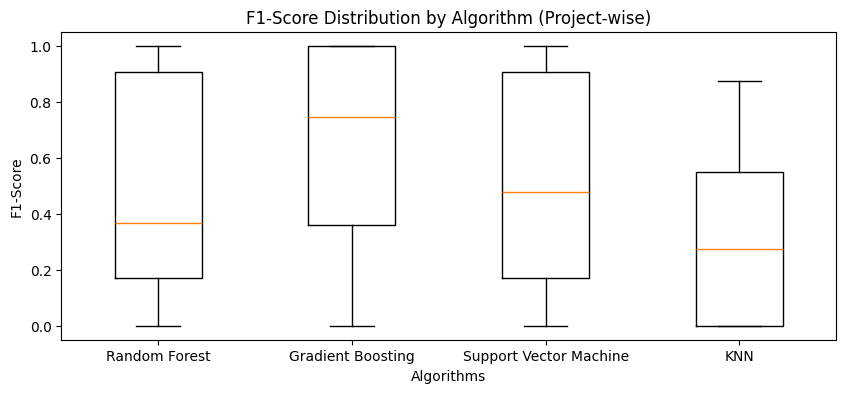

In [181]:
# Collect F1-scores for box plot
f1_scores_by_algorithm = {}
for algorithm, _ in algorithms.items():
  f1_scores_by_algorithm[algorithm] = []
  for project, scores in project_wise_f1.items():
    f1_scores_by_algorithm[algorithm].append(scores[algorithm])

# Create box plot
plt.figure(figsize=(10, 4))
plt.boxplot(f1_scores_by_algorithm.values(), tick_labels=f1_scores_by_algorithm.keys())
plt.xlabel("Algorithms")
plt.ylabel("F1-Score")
plt.title("F1-Score Distribution by Algorithm (Project-wise)")
plt.xticks